In [1]:
#Thang, Joel, Carlos

In [2]:
import numpy as np
from matplotlib.pylab import *
from scipy.optimize import curve_fit

In [3]:
lamda, Idata, sigma = np.loadtxt('Idata.txt', skiprows=3, unpack = True)

In [4]:
rcParams.update({'font.size': 20})

In [5]:
def lorentzian(lamda, I0, lamda0, gam, Ib):
    return I0 *  1/(1+ (4*(lamda - lamda0)**2)/gam**2) + Ib
xmod = np.linspace(min(lamda), max(lamda), 500)
I0, lamda0, gam, Ib = 1.2, 500.712, 0.001, 0.4
ymod = lorentzian(xmod, I0, lamda0, gam, Ib)

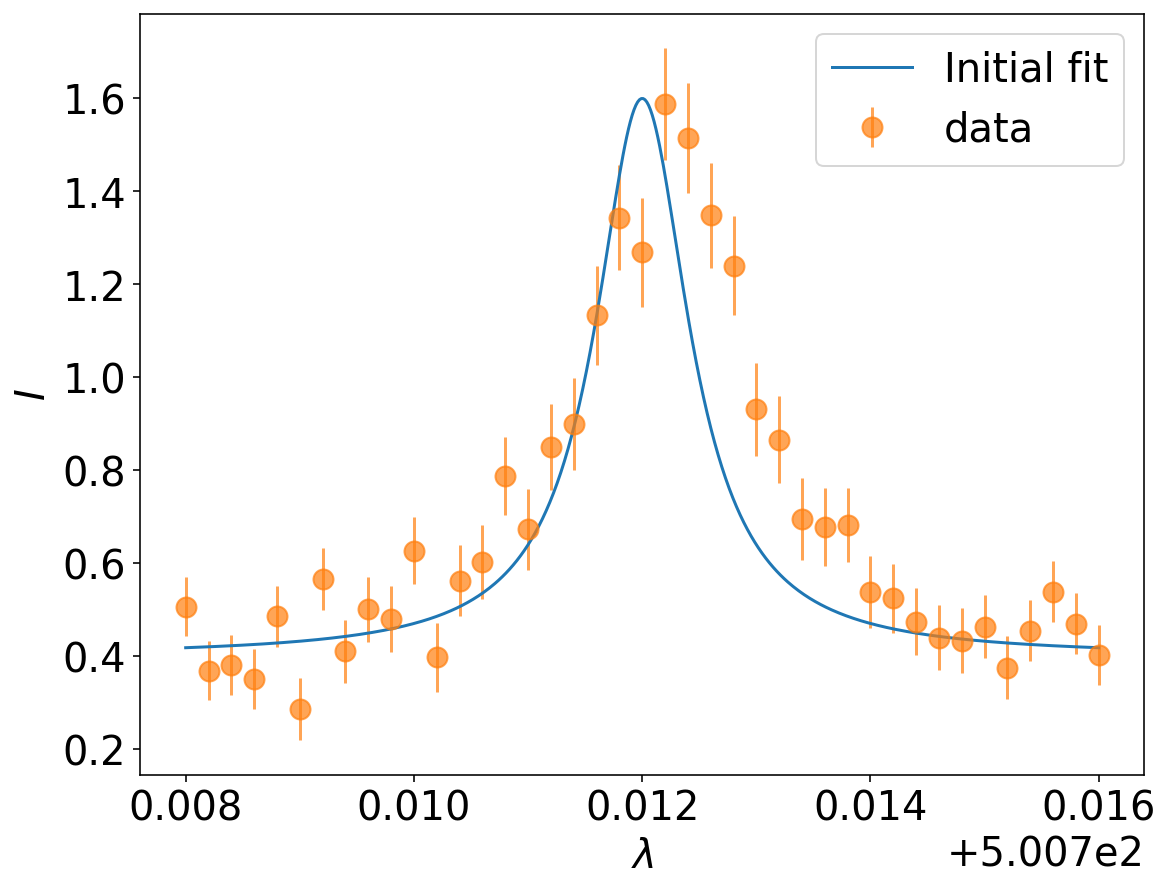

In [6]:
figure(figsize=(9,7))
errorbar(lamda,Idata ,sigma,fmt='o',c='C1',ms=10,alpha=0.7,label='data')
plot(xmod, ymod, label ='Initial fit')
xlabel('$\lambda$')
ylabel('$I$')
legend()
show()

In [7]:
params, cov = curve_fit(lorentzian, lamda, Idata, sigma = sigma, p0 = [1.2, 500.712, 0.001, 0.4])
dparams = sqrt(diag(cov) )
best_fit = params
print(params)
print(dparams)
chisq = sum( (Idata - lorentzian(lamda,*params) )**2 / sigma**2)
N_data = len(lamda)
N_dof = N_data - len(dparams)
print('chi-squared = %.2f, per DOF = %.2f' % (chisq, chisq/N_dof))

# y_mod2 = lora(x_mod,*params) # *params unpacks (splats) the tuple

[1.17074758e+00 5.00712234e+02 1.64560920e-03 3.64140787e-01]
[6.12452235e-02 3.83095227e-05 1.44002140e-04 2.16404716e-02]
chi-squared = 34.26, per DOF = 0.93


In [8]:
Ifit = lorentzian(xmod, params[0], params[1], params[2], params[3])

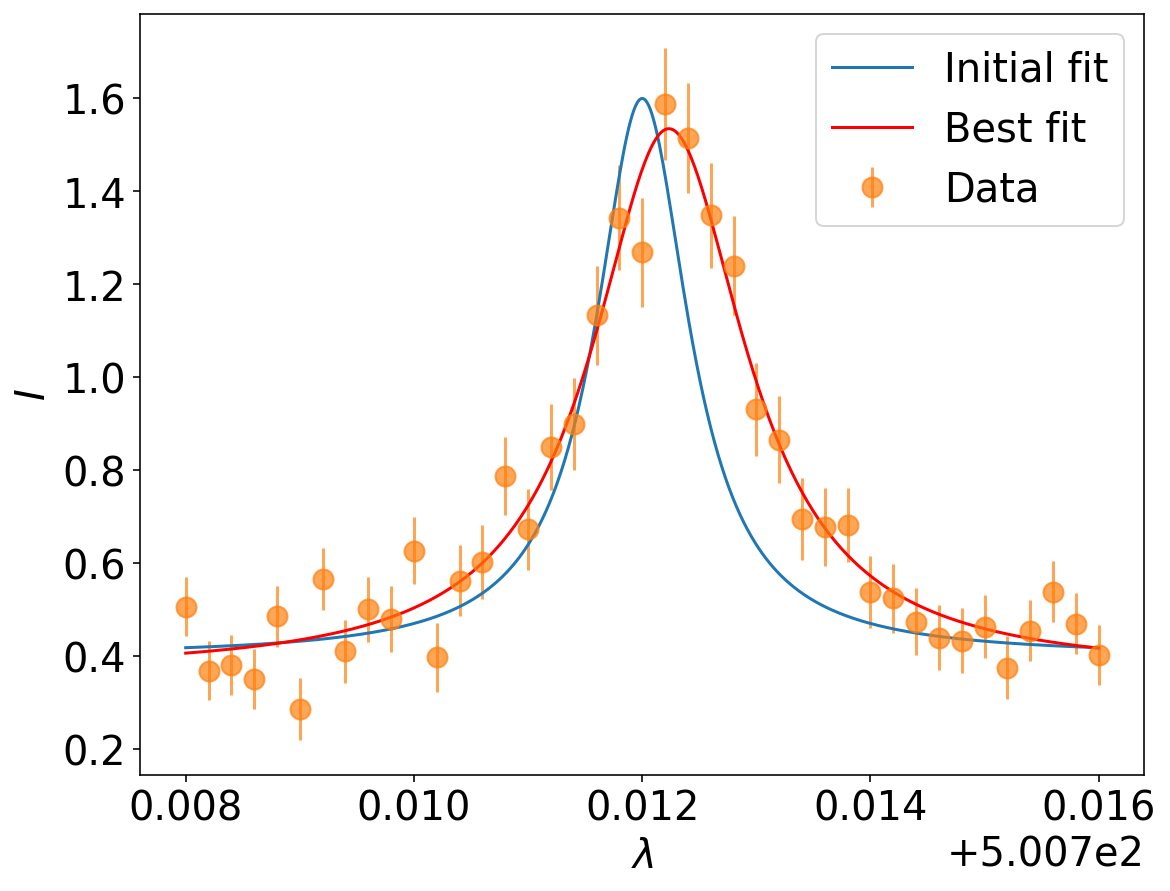

In [9]:
figure(figsize=(9,7))
errorbar(lamda,Idata ,sigma,fmt='o',c='C1',ms=10,alpha=0.7,label='Data')
plot(xmod, ymod, label ='Initial fit')
plot(xmod, Ifit, label = 'Best fit', color = 'r')
xlabel('$\lambda$')
ylabel('$I$')
legend()
show()

In [10]:
print(N_data*log(N_data)**2)

565.4153172788667


In [11]:
seed(0)
N_MC = 500
gam_vals = zeros(N_MC)
lamda0_vals = zeros(N_MC)

for i in range(N_MC) :
    indx = randint(0,N_data,size=N_data)
    lamda_new = copy(lamda[indx])
    Idata_new = copy(Idata[indx])
    sigma_new = copy(sigma[indx])
    params, cov = curve_fit(lorentzian, lamda_new, Idata_new, sigma = sigma_new, p0 = [1.2, 500.712, 0.001, 0.4])
    lamda0_vals[i] = params[1]
    gam_vals[i] = params[2]

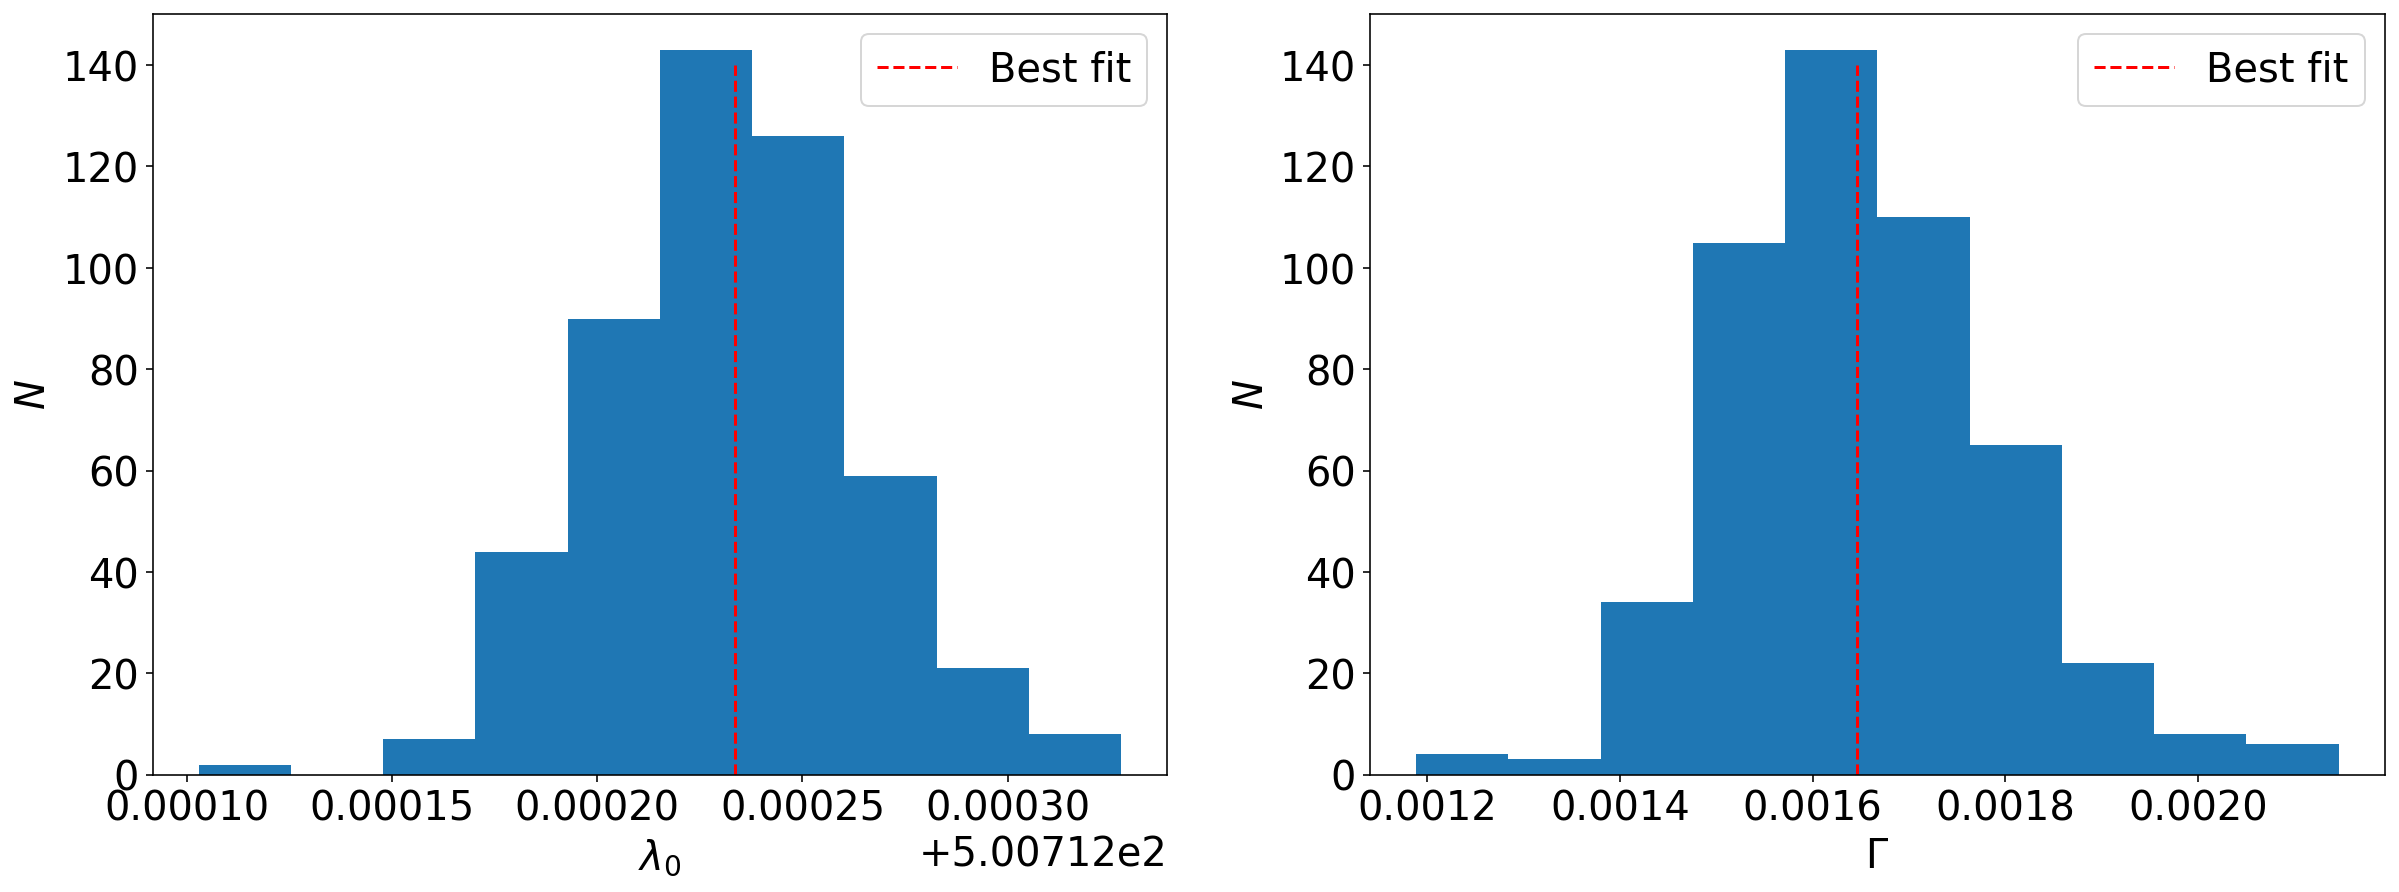

In [32]:
figure(figsize=(20,7))
subplot(1,2,1)
hist(lamda0_vals)
vlines(best_fit[1],0, 140, linestyles = 'dashed', label ='Best fit', color = 'r')
xlabel('$\lambda_0$')
ylabel('$N$')
legend()

subplot(1,2,2)
hist(gam_vals)
vlines(best_fit[2],0, 140, linestyles = 'dashed', label ='Best fit', color = 'r')
xlabel('$\Gamma$')
ylabel('$N$')
legend()
show()

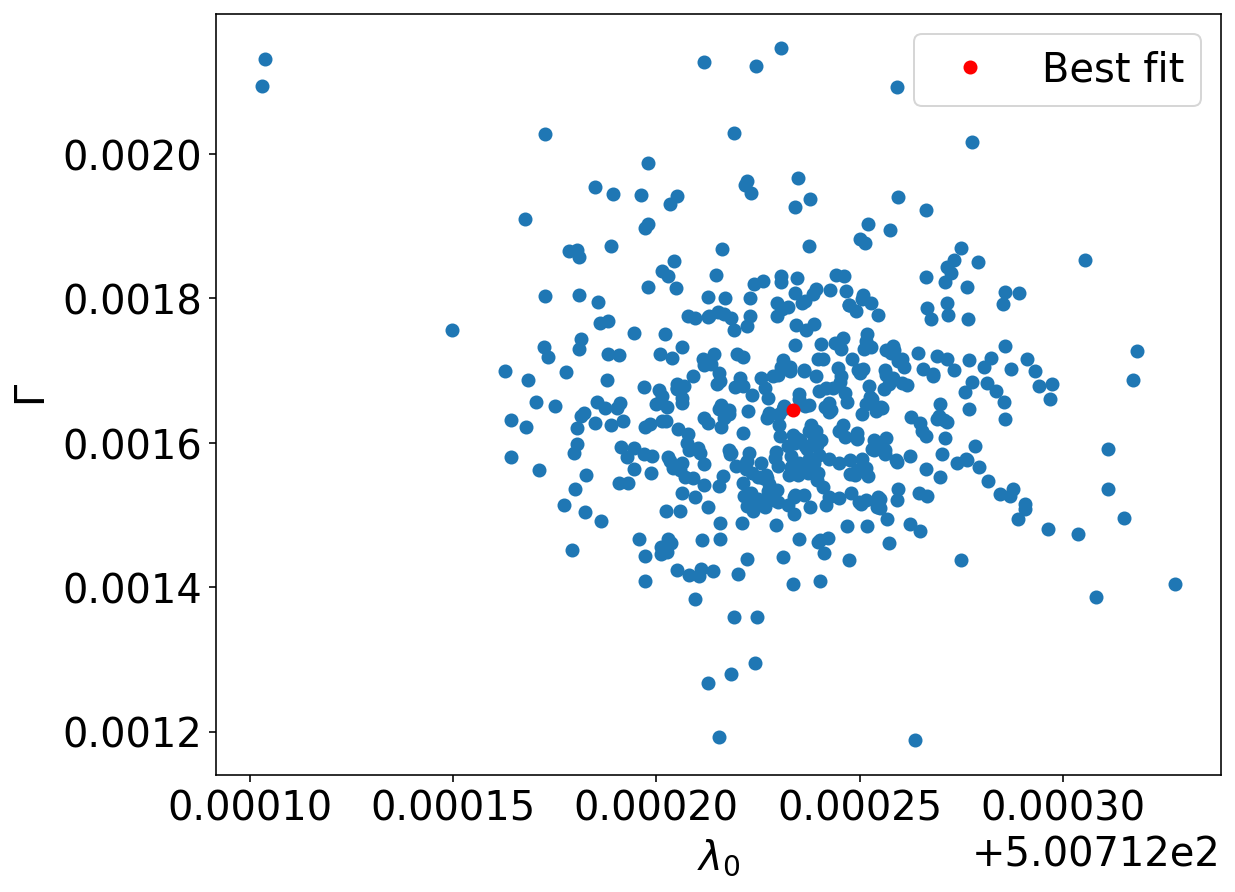

In [31]:
figure(figsize=(9,7))
scatter(lamda0_vals, gam_vals)
plot(best_fit[1], best_fit[2],'o', color ='r', label ='Best fit')
xlabel('$\lambda_0$')
ylabel('$\Gamma$')
legend()
show()

In [37]:
lamda0_sorted = sort(lamda0_vals)
# print(lamda0_sorted)
lower_limit = lamda0_sorted[80]
upper_limit = lamda0_sorted[420]
error_bar = (upper_limit - lower_limit) / 2
print('Lambda_0 is in the range %.5f to %.5f' % (lower_limit,upper_limit))
print('mean is %.5f +/- %.5f' % (mean(lamda0_sorted),error_bar))
print('difference in uncertainty between bootstrap and curve_fit method', dparams[1] -error_bar)

Lambda_0 is in the range 500.71220 to 500.71226
mean is 500.71223 +/- 0.00003
difference in uncertainty between bootstrap and curve_fit method 7.16410688114675e-06


In [36]:
gammean_sorted = sort(gam_vals)
#print(gammean_sorted)
lower_limit = gammean_sorted[80]
upper_limit = gammean_sorted[420]
error_bar = (upper_limit - lower_limit) / 2
print('Gamma is in the range %.5f to %.5f' % (lower_limit,upper_limit))
print('mean is %.5f +/- %.5f' % (mean(gammean_sorted),error_bar))
print('difference in uncertainty between bootstrap and curve_fit method', dparams[2] -error_bar)

Gamma is in the range 0.00152 to 0.00179
mean is 0.00165 +/- 0.00013
difference in uncertainty between bootstrap and curve_fit method 9.860527041390474e-06
